# Linear Regression

- One of the simplest and widely used algorithm for predictive modeling
- Tries to build a relationship between 
    - independent variable (input) `X` 
    - and dependent variable (output) `Y`

__Equations:__

_For simple data with single feature:_
$$\text{Y} = \text{mX + c}$$
- m: slope (or weight)  
- c: intercept (or bias term)

_For Multiple Linear Regression (multiple features):_
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + .... + \theta_n x_n $$

- $\hat{y}$: output (predicted value)  
- $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + .... + \theta_n x_n$: `weighted sum`  
- $X_i$: feature value of ith feature   
- $\theta_j$: model parameters, $\theta_0$ is `bias term` and $\theta_1,\theta_2...$ are `Feature weights`

_Two more representation of this function_

1. Vectorized form:  
$\theta$ and x are taken as vectors, $$\hat{Y} = h_\theta (x) = \theta \cdot X$$ 


$\theta$: Model parameters vector ($\theta_0$ bias term + $\theta_1,\theta_2...$ features wieight)  
$X$ : feature vector, containing feature value of an instance. $x_0$ is always $1$, $x_1$ to $x_n$ containg feature values  
$\hat{Y}$: output is a scalar,    
$h_\theta$: `hypothesis function` uses model parameters $\theta$


2. Matrix form:   

Let $n$ be original number of features and $m$ be total number of samples
- For single sample, i.e m=1

$$
\hat{y} = \theta^\top X
$$

$$
y \;=\;
\begin{pmatrix}
\theta_0 & \theta_1 & \cdots & \theta_n
\end{pmatrix}
\begin{pmatrix}
x_0 \\[6pt]
x_1 \\[6pt]
\vdots \\[6pt]
x_n
\end{pmatrix}
$$


$\hat{y}$: output by matrix multiplication (shape=1x1)   
$\theta$: column vector of shape (n+1)x1 [$\theta_0,\theta_1....\theta_n$]  
$x$: column vector of shape (n+1)x1, [$x_0, x_1,...,x_n$]. Contains feature values of single sample  

- For multiple samples, i.e m=m
$$
\hat{y} = X \theta
$$

$$
\begin{pmatrix}
\hat y^{(1)}\\
\hat y^{(2)}\\
\vdots\\
\hat y^{(m)}
\end{pmatrix}
=
\begin{pmatrix}
x_0^{(1)} & x_1^{(1)} & \dots & x_n^{(1)}\\
x_0^{(2)} & x_1^{(2)} & \dots & x_n^{(2)}\\
\vdots & \vdots & \ddots & \vdots\\
x_0^{(m)} & x_1^{(m)} & \dots & x_n^{(m)}
\end{pmatrix}
\begin{pmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n
\end{pmatrix}
$$

$\hat{y}$: output by matrix multiplication (shape=mx1)   
$x$: matrix of shape mx(n+1)  
$\theta$: matrix of shape (n+1)x1

$$
y \;=\;
\begin{pmatrix}
\theta_0 & \theta_1 & \cdots & \theta_n
\end{pmatrix}
\begin{pmatrix}
x_0 \\[6pt]
x_1 \\[6pt]
\vdots \\[6pt]
x_n
\end{pmatrix}
$$


### ___How do we train a model?___

what does `Training` a model refer to?  
Training a model refers to setting parameters such that the model best fits the training data.

What does `fitting` a model mean?  
Fitting refers to setting parameters such that the predictions of model closely matches the outputs (present in training set)

To find the best parameters, we need a measure of how good or bad the model is predicting, And that measure is called `Cost function or Loss function`  
- The most common performance measure is RMSE (for linear reg). 
- but as a cost function we gonna use MSE, because its easier to work with MSE and its gives the same result (because the value that minimizes MSE, also minimizes its root)
- Hence we have to find best $\theta$ that minimizes MSE

Note- This is often done in ML, that we dont use acutally commonly used perfomance matrix while evaluating final model, instead we use an easier-to-optimize function.

### ___MSE (Mean Squared Error)___
: cost function for a linear regression model

$$
MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

- m: Total number of instances
- $\hat{y}^{(i)}$: predicted value of ith instance. $\hat{y}^{(i)} = h_\theta (x_i)$
- $y^{(i)}$: Actual value (Ground truth) of that instance

_Now we have to find a parameter ($\theta$) that reduces the cost function_

- ### _The Normal Equation_
An equation that give $\theta$ for model

$$\hat{\theta} = (X^\top X)^{-1}X^\top y$$
$\hat{\theta}$: is the value of $\theta$ that minimize cost function (MSE)  
$X$: That feature vector of shape mxn  
$y$: Vector containing target values 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Setting up default canva for plots

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
## Test the equations
np.random.seed(42)
m = 100                         #number of instances
X = 2 * np.random.rand(m,1)     #shape of X = 100x1
y = 10+2*X + np.random.rand(m,1)                      #Target values

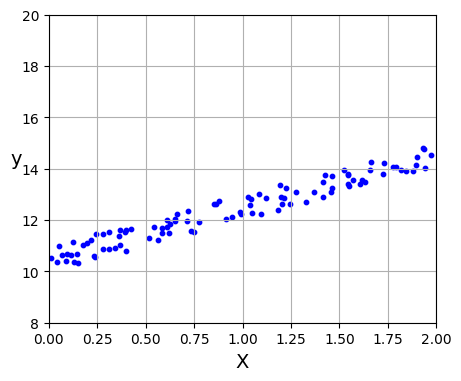

In [5]:
## Plot
plt.figure(figsize=(5,4))
plt.grid(True)
plt.axis([0,2,8,20])
plt.xlabel("X")
plt.ylabel("y",rotation=0)
plt.scatter(x=X,y=y,s=10,c='b')

In [6]:
## Finding best theta
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)     #Add that X0:1 to each instance

best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# ".T" does the tanspose, ".inv" does the inverse, "@" does matrix multiplication (If matrix) and dot product (If vector)
best_theta

array([[10.51359766],
       [ 1.98323418]])

The function we had was y = 10+2x+noise   
from this we expected 'best_theta' to be 10 and 2, but fair enough!

In [7]:
# Predicting
y_pred = 10.5135 + 1.983*X
print("Predicted values\n",y_pred[:5])
print("\n")
print("Acutal values\n",y[:5])

Predicted values
 [[11.99892611]
 [14.28403294]
 [13.41658797]
 [12.88777955]
 [11.13226993]]


Acutal values
 [[11.52958966]
 [14.43926764]
 [13.24233175]
 [12.90320463]
 [11.53164104]]


In [28]:
# Better way
np.random.seed(42)
X_new = np.random.uniform(0,2,(1000,1))
X_new_b = add_dummy_feature(X_new)
X_new_pred = X_new_b @ best_theta

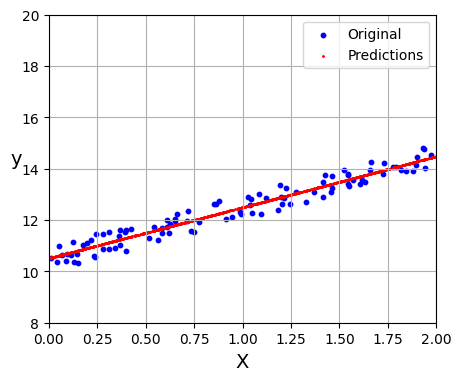

In [ ]:
plt.figure(figsize=(5,4))
plt.grid(True)
plt.axis([0,2,8,20])
plt.xlabel("X")
plt.ylabel("y",rotation=0)
plt.scatter(x=X,y=y,s=10,c='b',label='Original')
plt.scatter(x=X_new,y=X_new_pred,c='r',s=1,label='Predictions')

plt.legend(fontsize=10)

But there are more ways to get that $\theta$ such that cost function of linear regression model is minimum

1. The normal Equation:
$$\hat{\theta} = (X^\top X)^{-1}X^\top y$$

But when $(X^\top X)^{-1}$ does not exist, i.e X is singluar matrix or illfunctioned then there are two more ways.     
Under the hood they used _SVD (Singluar Value Decomposition)_ to compute numerically stable solution even when $(X^\top X)^{-1}$ doesnt exist.  

2. np.linalg.lstsq   
lstsq stands for _least square solver_, Uses SVD to compute $min_\theta(||X\theta - y||^2)$  
returns: Best_theta, residuals, Rank of matrix X, Singluar values of X  

3. np.linalg.pinv  
np.linalg.pinv computes the Moore–Penrose pseudoinverse of a matrix. It gives you a stable “inverse” even when the matrix isn’t square or is singular.  
Uses SVD to calculate $X^{+}$ (Psuedoinverse)  
We can get $$\hat{\theta} = X^{+}y$$


- Use pinv when you actually need the pseudoinverse matrix (e.g. for sensitivity analysis or multiple right‑hand sides).

- Use lstsq when you just want the best‑fit $\theta$ or residual, rank and singluar values 


In [30]:
## Using The normal equation
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
best_theta

array([[10.51359766],
       [ 1.98323418]])

In [31]:
## Using lstsq

best_theta_svd, residual, rank, singular_value = np.linalg.lstsq(X_b,y)
best_theta_svd

array([[10.51359766],
       [ 1.98323418]])

In [34]:
## Using pinv

pinv_X = np.linalg.pinv(X_b)
best_theta_pinv = pinv_X @ y
best_theta_pinv

array([[10.51359766],
       [ 1.98323418]])

In [36]:
## Getting it directly using LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.intercept_,lin_reg.coef_

(array([10.51359766]), array([[1.98323418]]))

### __Computational Complexity__ (of linear regression)

There are two methods for training linear regression model  
1. The normal equation:   
main cost: Doing inverse of $X^\top X$ which is a $(n+1)\times(n+1)$ matrix.
The time complexity is between $O(n^{2.4})-O(n^3)$ where $n$ is number of features.   
i.e if the number of features increase by 2x, time to train will increase by 8x


2. The SVD (Singular value decomposition)
It is used internally in _sklearn.linear_model.LinearRegression_   
The time complexity is $O(n^2)$  
Better than the normal equation but still kinda bad for large number of features   


`Note:`  
- Though, the time complexity for samples is linear, i.e $O(n)$ → training time roughly doubles when number of samples is doubled.  Which is good !

- Predictions are fast. time complexity for predictions are linear for both number of samples and number of features.   
    - On prediction, If you double the number of samples, prediction time will be doubled.   
    - If your model was trained on n features, prediction time is proportional to n.But if you design a new model (retrain) with 2n features and then predict — the prediction time will be roughly doubled compared to the old model.

- ### _Gradient Descent_

Rather than directly computing the $\theta$ vector, it uses an _iterative_ approach to get that $\theta$.  
The idea is to: _Tweak the parameters until you get minumum cost function_ (here MSE)

Steps: 
- Random initialization: Randomly select the parameter and calculate the slope (gradient)
- Try to move in the direction where slope is getting closer to _Zero_ (Hence, Cost function minimum)
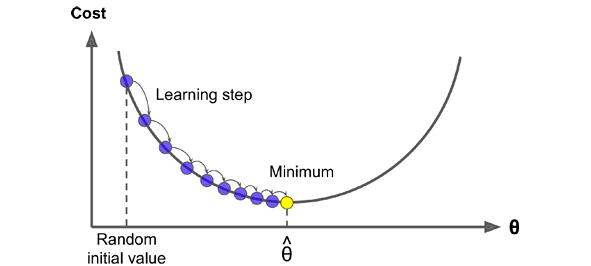
- Learning rate: i.e size of steps,   
if the learning rate is too small → the algorithm will have to go through many iterations(which is costly). 
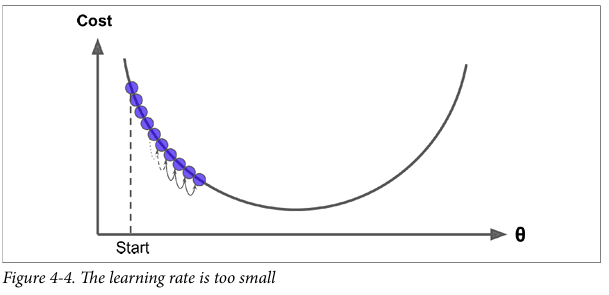

    And if the learning rate is too big → algorithm can miss the minimum point.
    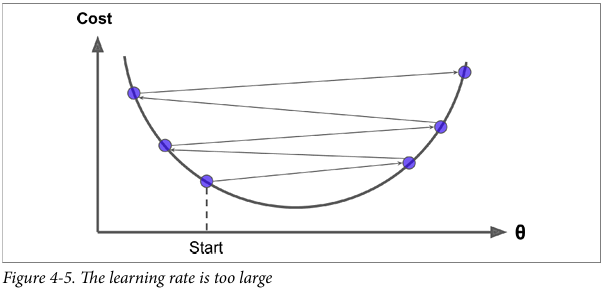
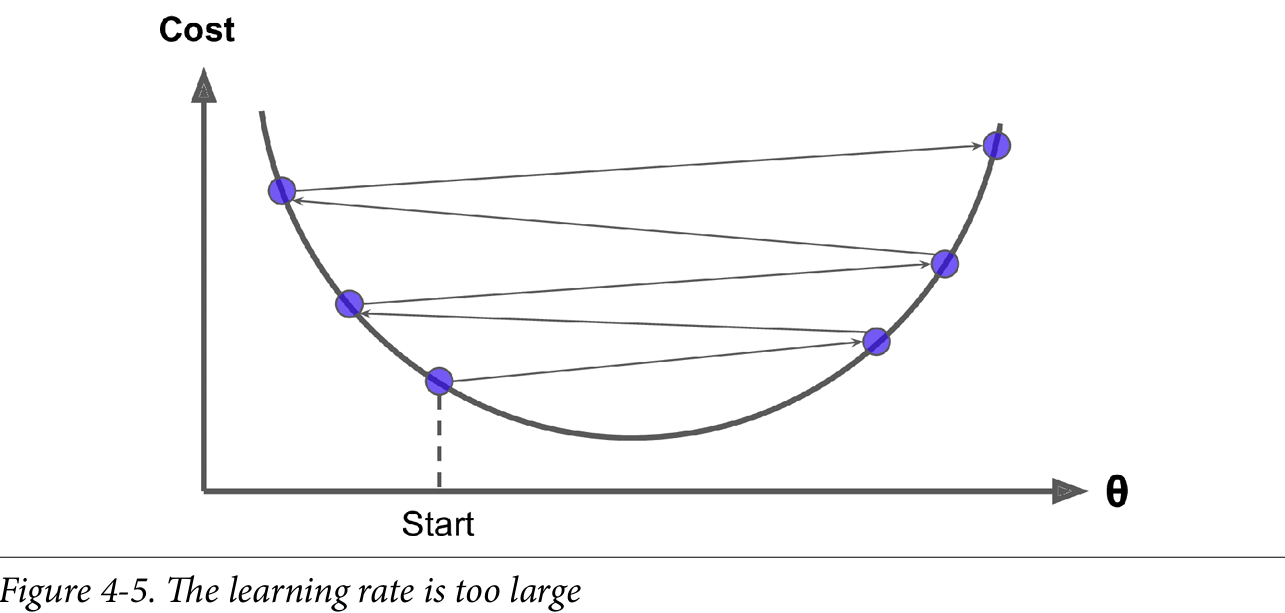

__Problem with Gradient Descent__  
The cost functions sometimes may not be so simple, may contain different shapes, bends, holes etc.
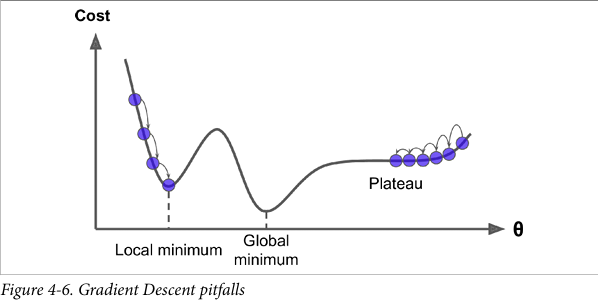

Fortunately thats not the case with MSE cost function for Linear Regression  

___MSE Cost function for Linear Regression is:___
- Convex function - looks like a bowl
- only one minimum exists (Global minima)
- The slope does not change suddenly - No death zones

Hence, if given a proper learning rate and enough iterations - Gradient Descent will converge on minimum mostly

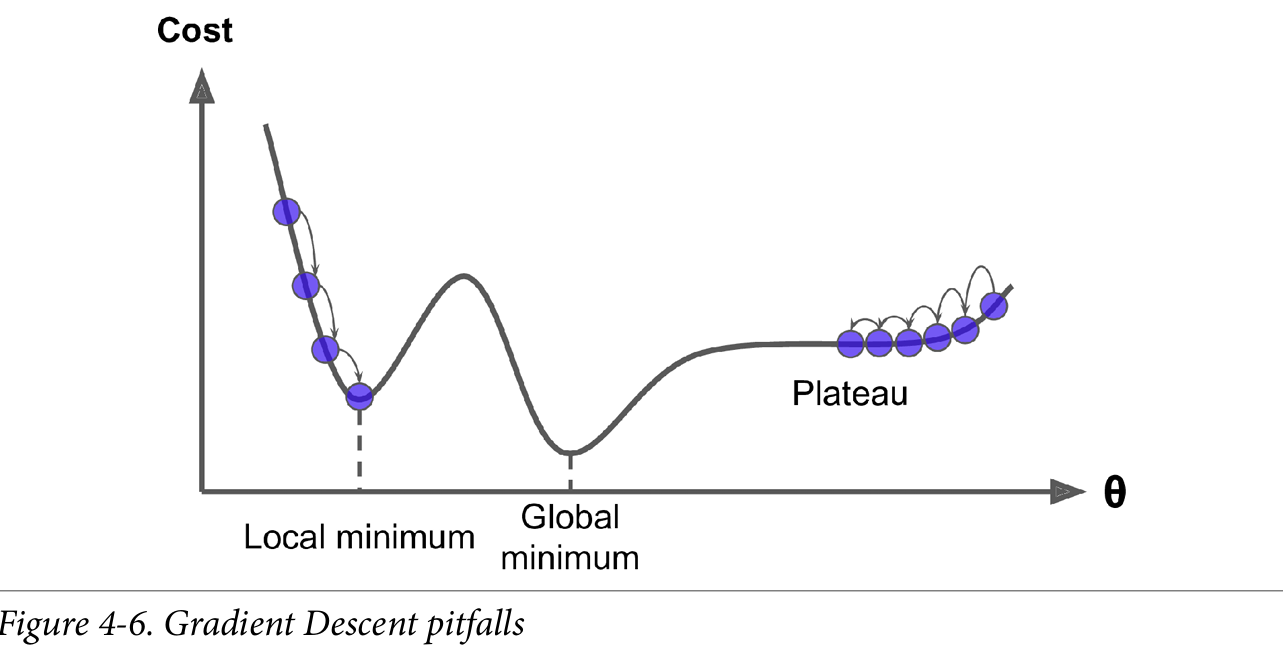

___Effect of `Feature Scaling` on gradient descent___

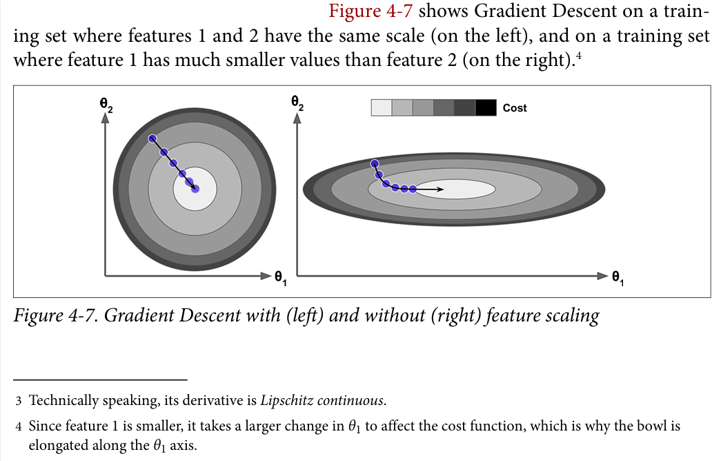


 When using Gradient Descent, you should ensure that all features
 have a similar scale (e.g., using Scikit-Learn’s StandardScaler
 class), or else it will take much longer to converge.